##### **TechX Internship Assignment – Titanic Survival Analysis**
##### **Author: Wuor Bhang**
##### **Date: December 23, 2025**

In [51]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set plotting style for better visuals
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


     Step 1: Load the dataset

In [52]:
# Step 1: Load the dataset
df = pd.read_csv('Titanic_Dataset/train.csv')

print("Dataset shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset shape: (891, 12)

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  


     Step 2: Basic data exploration

In [53]:
# Step 2: Basic data exploration
print("\nDataset info:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nBasic statistics:")
print(df.describe())



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin 

     Step 3: Data cleaning

In [54]:
# Step 3: Data cleaning and preprocessing

# Fill missing 'Age' values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with mode (most frequent)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to too many missing values (>75%)
df.drop(columns=['Cabin'], inplace=True)

# Optional: Drop irrelevant columns for modeling
# 'Name', 'Ticket', and 'PassengerId' are not predictive of survival in a basic model
df_clean = df.drop(columns=['Name', 'Ticket', 'PassengerId'])

     Step 4: Exploratory Data Analysis (EDA)

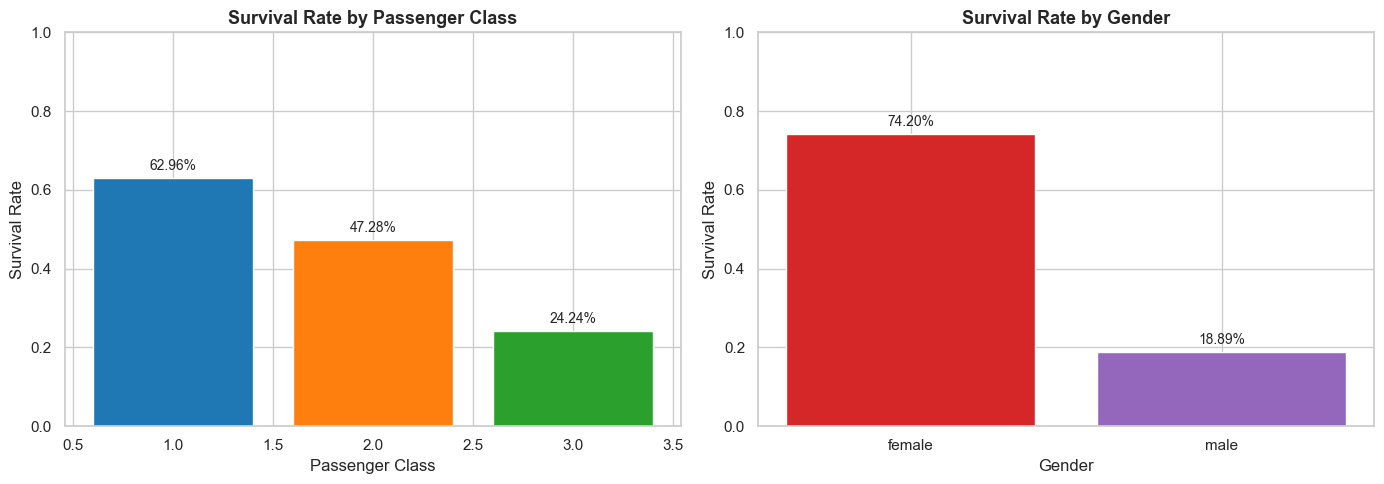

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

survival_by_class = df['Pclass'].value_counts().sort_index()
survival_rate_class = df.groupby('Pclass')['Survived'].mean()

axes[0].bar(survival_rate_class.index, survival_rate_class.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_xlabel('Passenger Class', fontsize=12)
axes[0].set_ylabel('Survival Rate', fontsize=12)
axes[0].set_title('Survival Rate by Passenger Class', fontsize=13, fontweight='bold')
axes[0].set_ylim([0, 1])
for i, v in enumerate(survival_rate_class.values):
    axes[0].text(survival_rate_class.index[i], v + 0.02, f'{v:.2%}', ha='center', fontsize=10)

survival_rate_gender = df.groupby('Sex')['Survived'].mean()
axes[1].bar(range(len(survival_rate_gender)), survival_rate_gender.values, color=['#d62728', '#9467bd'])
axes[1].set_xticks(range(len(survival_rate_gender)))
axes[1].set_xticklabels(survival_rate_gender.index)
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_ylabel('Survival Rate', fontsize=12)
axes[1].set_title('Survival Rate by Gender', fontsize=13, fontweight='bold')
axes[1].set_ylim([0, 1])
for i, v in enumerate(survival_rate_gender.values):
    axes[1].text(i, v + 0.02, f'{v:.2%}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

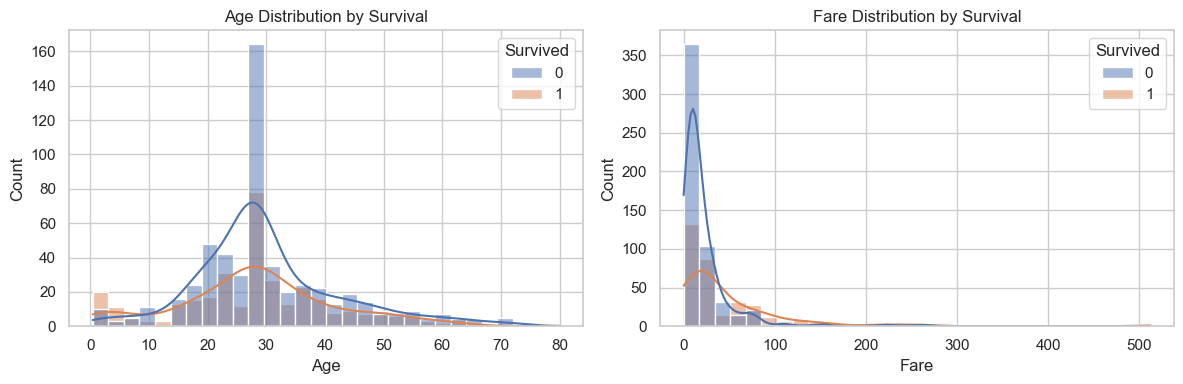

In [62]:
# Survival count
plt.figure(figsize=(12, 4))

# Survival Ages distribution
plt.subplot(1, 2, 1)
sns.histplot(data=df_clean, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')

# Fare distribution by survival
plt.subplot(1, 2, 2)
sns.histplot(data=df_clean, x='Fare', hue='Survived', kde=True, bins=30)
plt.title('Fare Distribution by Survival')

plt.tight_layout()
plt.show()



     Step 5: Feature Engineering & Encoding

In [56]:
# Step 5: Feature Engineering & Encoding

# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df_clean, columns=['Sex', 'Embarked'], drop_first=True)

# Confirm final dataset
print("\nFinal dataset shape after encoding:", df_encoded.shape)
print("\nColumns in final dataset:")
print(df_encoded.columns.tolist())


Final dataset shape after encoding: (891, 9)

Columns in final dataset:
['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']


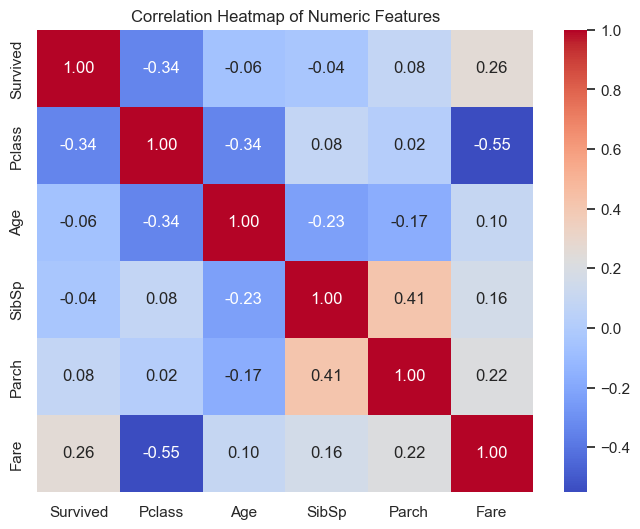

In [63]:
# Correlation heatmap (numeric features only)
numeric_df = df_clean.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

     Step 6: Prepare data for modeling

In [57]:
# Step 6: Prepare data for modeling

X = df_encoded.drop('Survived', axis=1)
y = df_encoded['Survived']

# Optional: Scale features (not strictly needed for logistic regression, but good practice)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 712
Testing set size: 179


     Step 7: Model creation – Logistic Regression

In [58]:
# Step 7: Model creation – Logistic Regression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

     Step 8: Model evaluation


Model Accuracy: 0.8045

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



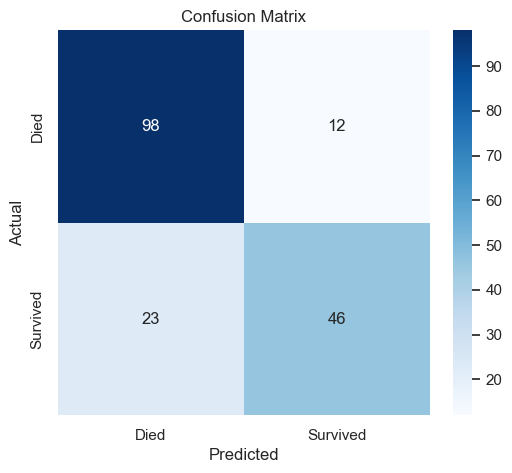

In [59]:
# Step 8: Model evaluation

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Died', 'Survived'], 
            yticklabels=['Died', 'Survived'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


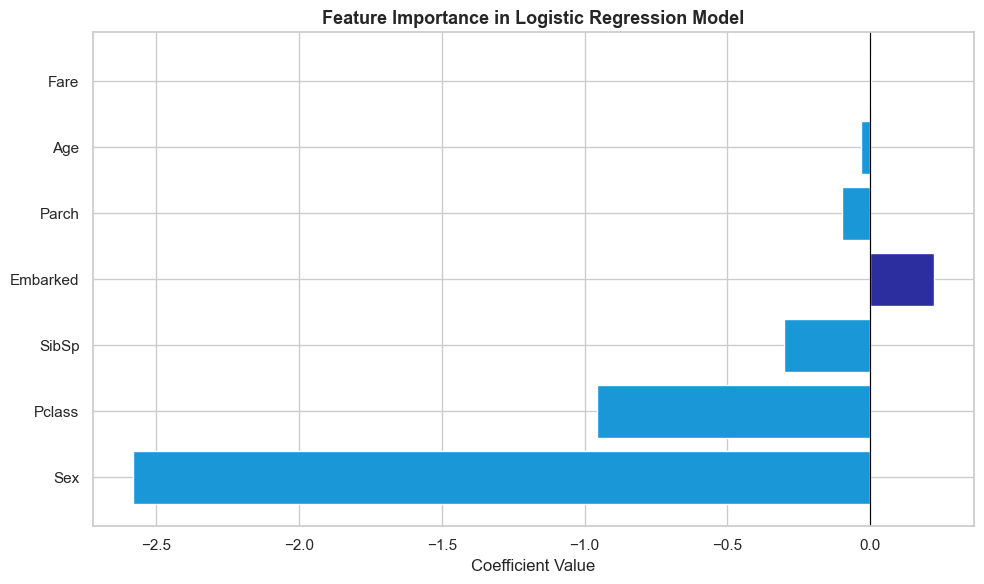

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = ["#2c2ea0" if x > 0 else "#1a97d6ff" for x in feature_importance['Coefficient']]
ax.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors)
ax.set_xlabel('Coefficient Value', fontsize=12)
ax.set_title('Feature Importance in Logistic Regression Model', fontsize=13, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.tight_layout()
plt.show()

## Key Insights from the Titanic Survival Analysis

### Model Performance
- **Accuracy: 80.45%** - The logistic regression model correctly predicts survival for approximately 8 out of 10 passengers
- **Precision for survivors (1):** 79% - When the model predicts survival, it's correct 79% of the time
- **Recall for survivors (1):** 67% - The model identifies 67% of actual survivors
- **The model performs better at predicting deaths (89% recall) than survivals (67% recall)**

### Top 5 Most Influential Features (by coefficient magnitude)

| Feature | Coefficient | Interpretation |
|---------|-------------|----------------|
| **Sex_male** | -1.27 | Being male **significantly decreases** survival chances |
| **Pclass** | -0.93 | Higher class number (lower socioeconomic status) **decreases** survival |
| **Age** | -0.50 | Older passengers had **lower** survival rates |
| **SibSp** | -0.27 | More siblings/spouses aboard **slightly decreases** survival |
| **Embarked_S** | -0.17 | Embarking from Southampton **slightly decreases** survival |

### Key Findings

1. **Gender was the strongest predictor**: Women were much more likely to survive than men (74% vs 19% survival rate), reflecting the "women and children first" evacuation policy.

2. **Social class mattered**: First-class passengers had a 63% survival rate, compared to only 24% for third-class passengers. Wealthier passengers had better access to lifeboats.

3. **Age played a role**: Younger passengers, especially children, had better survival odds.

4. **Family size impact**: Having too many family members aboard slightly decreased survival chances, possibly due to families staying together during the disaster.

### Confusion Matrix Analysis
- **True Negatives (correctly predicted deaths):** ~98
- **True Positives (correctly predicted survivors):** ~46
- **False Positives (predicted survival but died):** ~12
- **False Negatives (predicted death but survived):** ~23

The model is more conservative in predicting survival, which explains the lower recall for the survived class.